Aluno: Felipe Miranda Cardoso de Sá
<br> Matrícula: 201802677
<br> PDI - Processamento Digital de Imagens
<br> Professor: Cassio Denner


Projeto 1-<br><br>Leia sobre “Linear Blending” (Burger, p. 85). Compreenda o código do Prog. 4.5 e o exemplo da
Fig. 4.23. <br><br>
a) Implemente uma classe Linear_Blending em Python, tal como a utilizada no exemplo de “blending”
da p. 86 e mostre os resultados para os diferentes valores de alpha em seu caderno de notas de
laboratório (J. Notebook). Não é necessário uma janela de diálogo.<br><br>
b) Usando imagens de sua escolha, ilustre a utilidade da classe na implementação do realce/destaque
de objetos em uma imagem.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image

basewidth = 1111
img = Image.open("/content/drive/MyDrive/HistogramasPDI/imagens/Fig0334(a)(hubble-original).tif")
img = img.resize((512,512), Image.ANTIALIAS)
img.save('./hubble.tif')
hubble = cv2.imread('./hubble.tif', cv2.IMREAD_GRAYSCALE)

In [ ]:
lena = cv2.imread("/content/drive/MyDrive/HistogramasPDI/imagens/lena.png", cv2.IMREAD_GRAYSCALE)

Imagens que serão misturadas

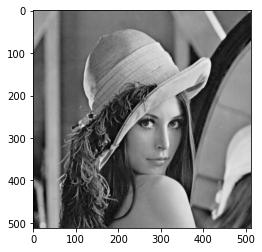

In [ ]:
plt.figure(0)
plt.imshow(lena, cmap='gray');

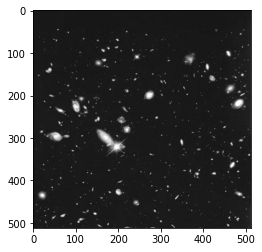

In [ ]:
plt.imshow(hubble, cmap='gray');

Alpha Blending

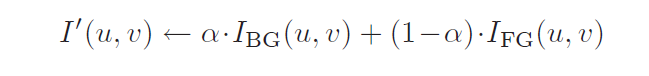

In [ ]:
def alpha_blending(img1, img2, alpha):
  W1, H1 = img1.shape
  W2, H2 = img2.shape  

  new_img = img1.copy()
  #print(W1, H1)
  #print(W2, H2)
  for v in range(0,H1): 
      for u in range(0,W1):
          blended_pixel = (img1[u,v] * alpha) + ((1 - alpha) * img2[u,v])
          if blended_pixel >= 255:
            new_img[u,v] = 255
          elif blended_pixel <= 0:
            new_img[u,v] = 0
          else:
            new_img[u,v] = blended_pixel
  return new_img

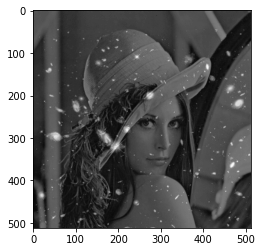

In [ ]:
blended_image = alpha_blending(lena, hubble, 0.5)
plt.imshow(blended_image, cmap='gray');

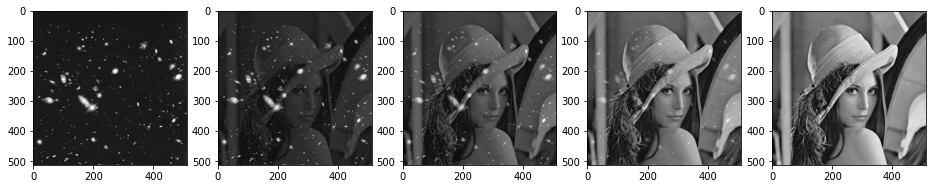

In [ ]:
f, axarr = plt.subplots(1,5, figsize=(16,64))

axarr[0].imshow(alpha_blending(lena, hubble, 0), cmap='gray')
axarr[1].imshow(alpha_blending(lena, hubble, 0.25), cmap='gray')
axarr[2].imshow(alpha_blending(lena, hubble, 0.5), cmap='gray')
axarr[3].imshow(alpha_blending(lena, hubble, 0.75), cmap='gray')
axarr[4].imshow(alpha_blending(lena, hubble, 0.99), cmap='gray')

Projeto 2-<br><br> Leia sobre “funções de transformação linear definidas por partes” (Gonzalez, 3.2.4, p. 74) e
verifique sua utilidade para o estudo de alargamento de contraste apresentado no livro texto do Gonzalez.
Reproduza o resultado da Figura 3.10.

Alargamento por contraste

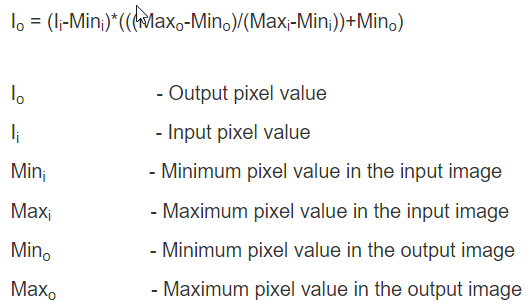

In [ ]:
def contrast_stretch(img, minImg = None, maxImg = None, minOut = 0, maxOut = 255):
  W, H = img.shape 
  if minImg == None:
     minImg = img.min()
  if maxImg == None:
     maxImg = img.max()

  new_img = img.copy()

 
  

  for v in range(0,H): 
      for u in range(0,W):
          pixel = img[u,v]
          stretch = (pixel - minImg) *(((maxOut-minOut)/(maxImg-minImg))+minOut)
          #if stretch >= 255:
          #  new_img[u,v] = 255
          #elif stretch <= 0:
          #  new_img[u,v] = 0
          #else:
          new_img[u,v] = stretch
  return new_img

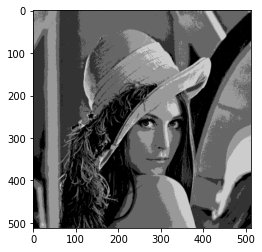

In [ ]:
stretched_image = contrast_stretch(lena, minOut = 0, maxOut = 5)
plt.imshow(stretched_image, cmap='gray');

Imagem original do Livro

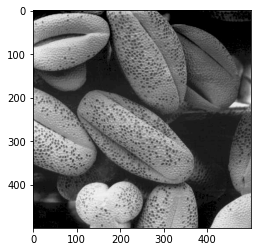

In [ ]:
cell = cv2.imread("/content/drive/MyDrive/HistogramasPDI/imagens/Fig0320(2)(2nd_from_top).tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(cell, cmap='gray');

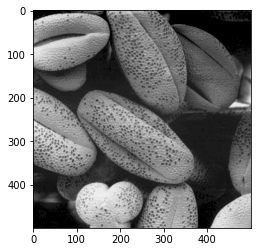

In [ ]:
stretched_image = contrast_stretch(cell, minOut = 0, maxOut = 255)
plt.imshow(stretched_image, cmap='gray');

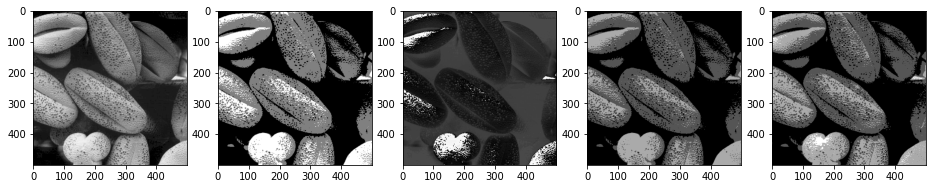

In [ ]:
f, axarr = plt.subplots(1,5, figsize=(16,64))

                                          #s1         #r1          #s2            #r2                                  
axarr[0].imshow(contrast_stretch(cell, minImg = 0, maxImg = 255, minOut = 0, maxOut = 255), cmap='gray') #s1 == r1 e s2 == r2  não acontece mudanças
axarr[1].imshow(contrast_stretch(cell, minOut = 0, maxOut = 3), cmap='gray') 
axarr[2].imshow(contrast_stretch(cell, minImg = 0, maxImg = 255, minOut = 254, maxOut = 255), cmap='gray')
axarr[3].imshow(contrast_stretch(cell, minOut = 0.05, maxOut = 0.75), cmap='gray')
axarr[4].imshow(contrast_stretch(cell, minOut = 0.05, maxOut = 0.99), cmap='gray')

Projeto 3- <br><br> O foco desse projeto é experimentar com “equalização de histograma” (Gonzalez, 3.3.1, p. 79)
Leia o Exemplo 3.5 (p. 82), didático e simples, como preparação. Leia então o Exemplo 3.6 e reproduza os
resultados práticos da Figura 3.20 do Gonzalez.

Imagens Originais

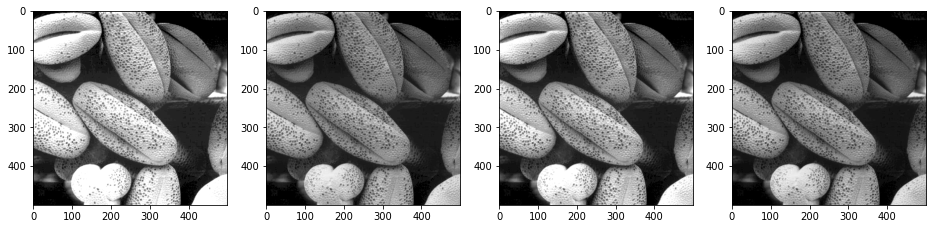

In [ ]:
img_316_1 = cv2.imread("/content/drive/MyDrive/HistogramasPDI/imagens/Fig0320(1)(top_left).tif", cv2.IMREAD_GRAYSCALE)
img_316_2 = cv2.imread("/content/drive/MyDrive/HistogramasPDI/imagens/Fig0320(2)(2nd_from_top).tif", cv2.IMREAD_GRAYSCALE)
img_316_3 = cv2.imread("/content/drive/MyDrive/HistogramasPDI/imagens/Fig0320(3)(third_from_top).tif", cv2.IMREAD_GRAYSCALE)
img_316_4 = cv2.imread("/content/drive/MyDrive/HistogramasPDI/imagens/Fig0320(4)(bottom_left).tif", cv2.IMREAD_GRAYSCALE)

f, axarr = plt.subplots(1,4, figsize=(16,64))                          
axarr[0].imshow(img_316_1, cmap='gray') 
axarr[1].imshow(img_316_2, cmap='gray') 
axarr[2].imshow(img_316_3, cmap='gray') 
axarr[3].imshow(img_316_4, cmap='gray') 

In [ ]:
def computa_histograma(img):
    W, H = img.shape 
    h = np.zeros(256, np.uint64) 
    for v in range(0,H): 
        for u in range(0,W):
            i = img[u,v]
            h[i] = h[i]+1
    
    return h

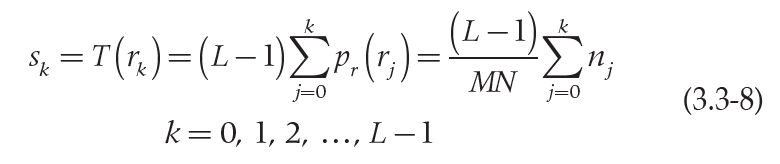

In [270]:
def equaliza_histograma(img):
  s = img.shape
  hist = computa_histograma(img)
  hist = hist.reshape(1,256)
  y = np.array([])
  y = np.append(y,hist[0,0])

  for i in range(255):
    k = hist[0,i+1]+y[i]
    y = np.append(y,k)

  y = np.round((y/(s[0]*s[1]))*(255))
  new_img = img.copy()

  for i in range(s[0]):
    for j in range(s[1]):
      k = img[i,j]
      new_img[i,j] = y[k]
  return new_img

Figura 3.20 do Gonzales

<BarContainer object of 256 artists>

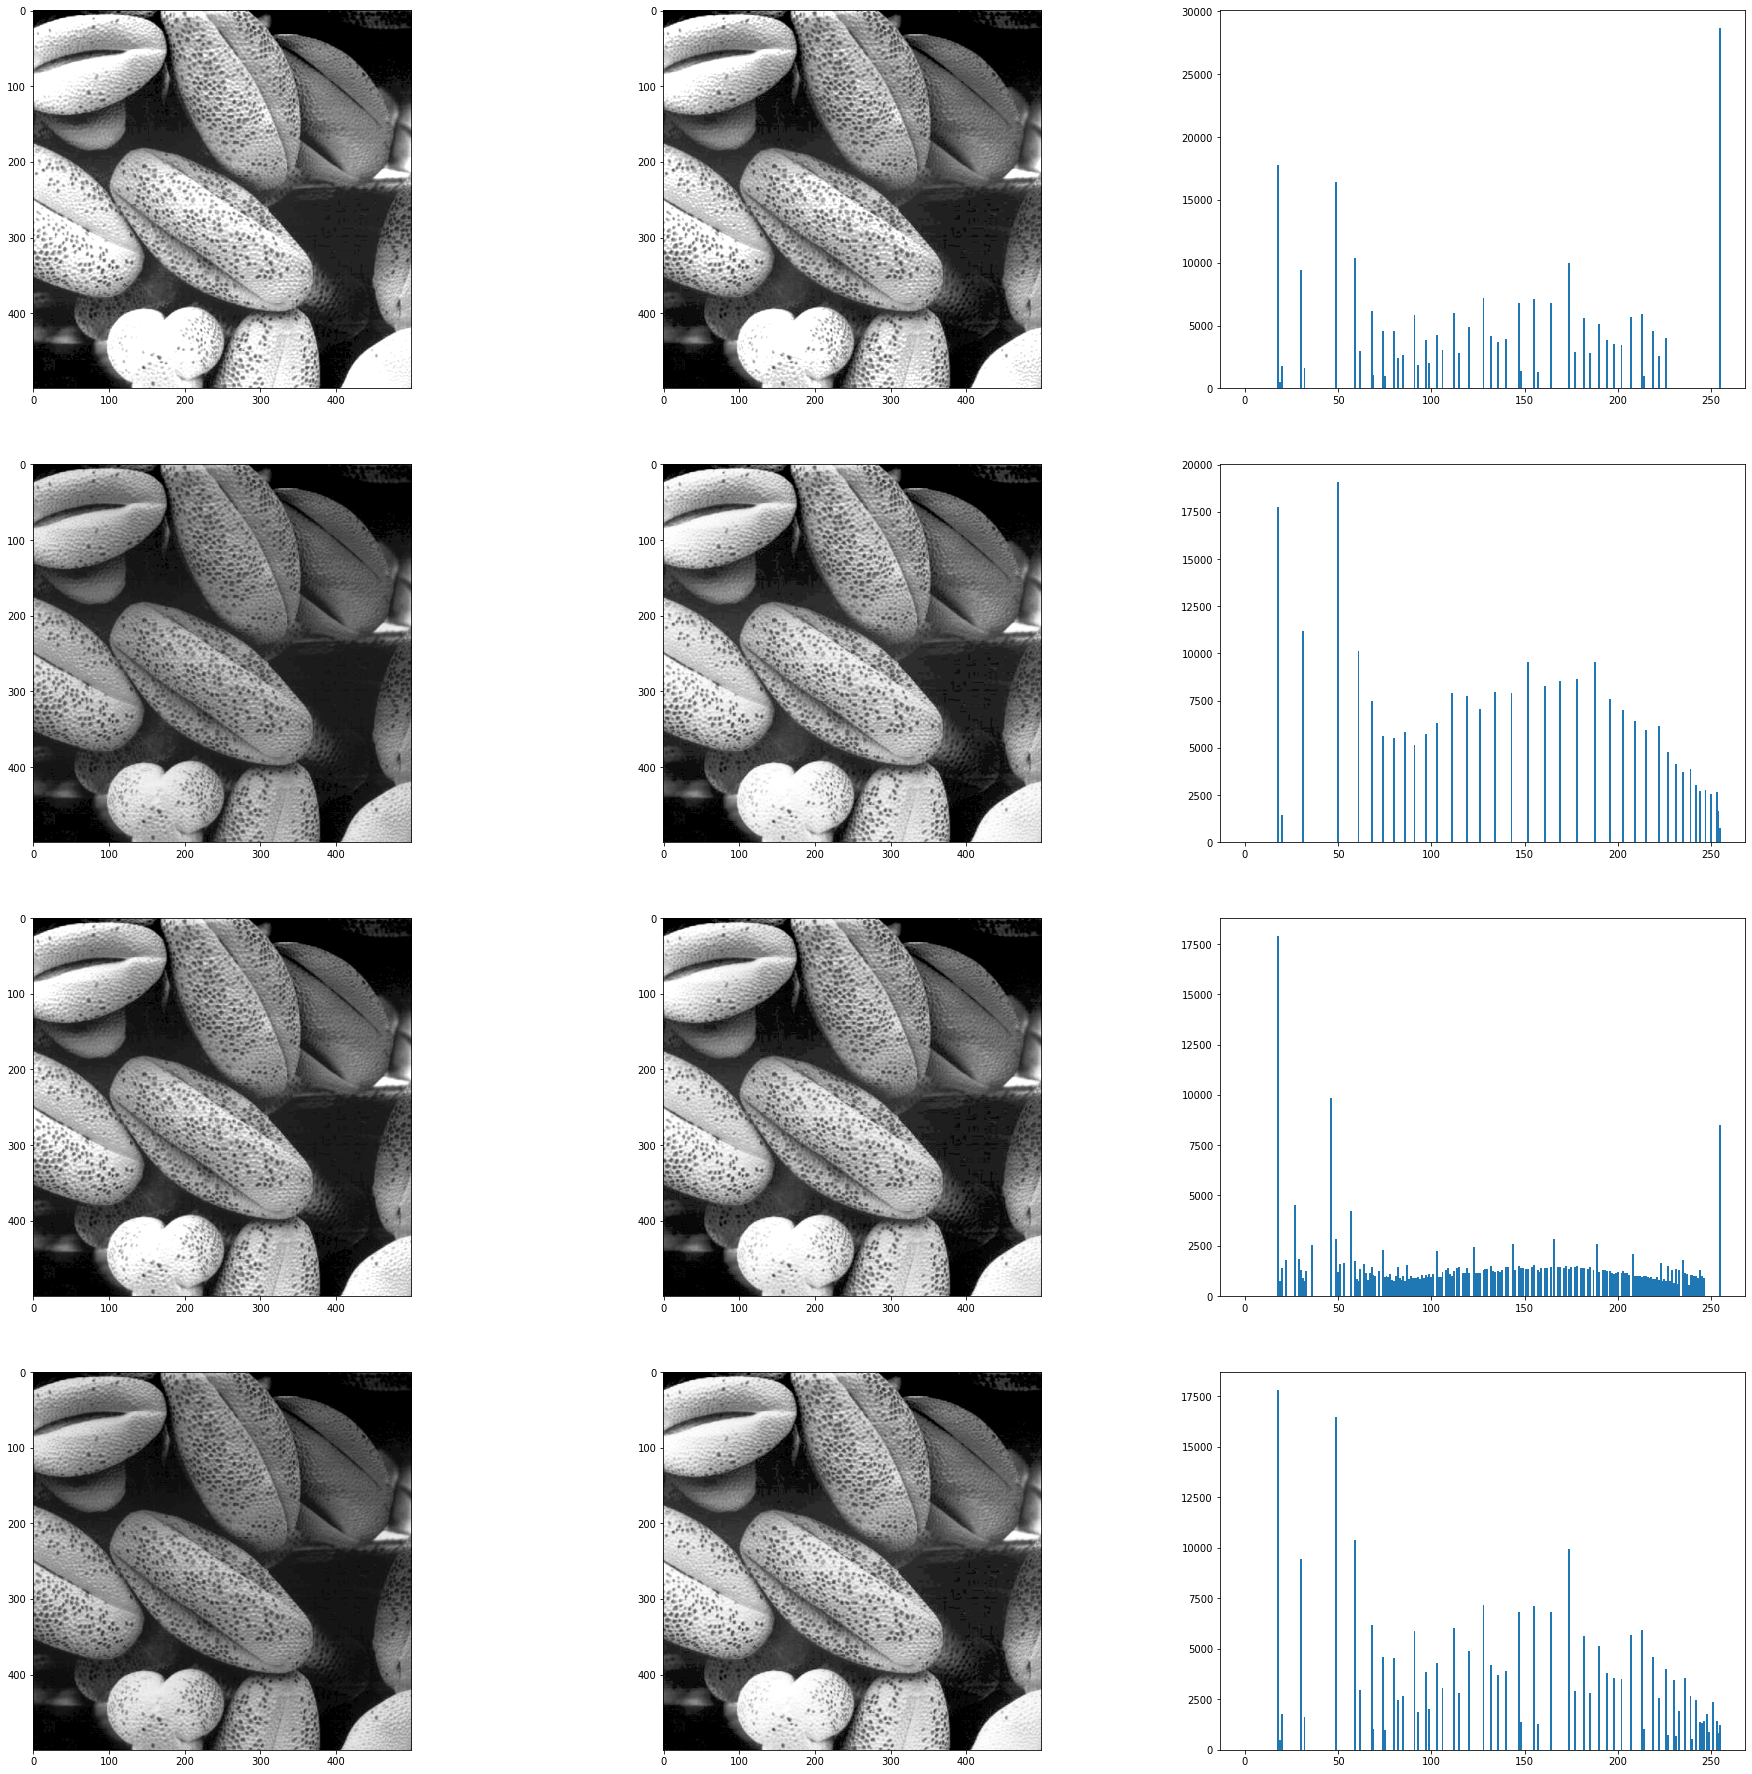

In [271]:
f, axarr = plt.subplots(4,3, figsize=(32,32))                          
axarr[0,0].imshow(img_316_1, cmap='gray') #imagem original 
axarr[0,1].imshow(equaliza_histograma(img_316_1), cmap='gray') #após a equalização
axarr[0,2].bar(range(0, 256), computa_histograma(equaliza_histograma(img_316_1)), linewidth=50, width=1) #histograma

axarr[1,0].imshow(img_316_2, cmap='gray') #imagem original
axarr[1,1].imshow(equaliza_histograma(img_316_2), cmap='gray') #após a equalização
axarr[1,2].bar(range(0, 256), computa_histograma(equaliza_histograma(img_316_2)), linewidth=50, width=1) #histograma

axarr[2,0].imshow(img_316_3, cmap='gray') #imagem original
axarr[2,1].imshow(equaliza_histograma(img_316_3), cmap='gray') #após a equalização
axarr[2,2].bar(range(0, 256), computa_histograma(equaliza_histograma(img_316_3)), linewidth=50, width=1) #histograma

axarr[3,0].imshow(img_316_4, cmap='gray') #imagem original
axarr[3,1].imshow(equaliza_histograma(img_316_4), cmap='gray') #após a equalização
axarr[3,2].bar(range(0, 256), computa_histograma(equaliza_histograma(img_316_4)), linewidth=50, width=1) #histograma